<a href="https://colab.research.google.com/github/tluistorres/Cursos/blob/main/TelecomX_parte2_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as sn
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dados = pd.read_csv('/content/dados_tratado.csv')

In [5]:
dados.head()

,ID_Cliente,Cancelou,Genero,Idoso,Possui_Conjuge,Possui_Dependentes,Meses_Permanencia,Servico_Telefone,Multiplas_Linhas,Tipo_Internet,...,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Digital,Metodo_Pagamento,Cobranca_Mensal,Cobranca_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [6]:
dados.columns

Index(['ID_Cliente', 'Cancelou', 'Genero', 'Idoso', 'Possui_Conjuge',
       'Possui_Dependentes', 'Meses_Permanencia', 'Servico_Telefone',
       'Multiplas_Linhas', 'Tipo_Internet', 'OnlineSecurity', 'Backup_Online',
       'Protecao_Dispositivo', 'Suporte_Tecnico', 'Streaming_TV',
       'Streaming_Filmes', 'Tipo_Contrato', 'Fatura_Digital',
       'Metodo_Pagamento', 'Cobranca_Mensal', 'Cobranca_Total'],
      dtype='object')

In [7]:
dados.dropna(subset=['Cancelou'], inplace=True)



In [8]:
dados.to_csv('dados_tratados.csv', index=False)

Para avaliar o desequilíbrio, podemos calcular a razão entre as classes:

Vamos calcular a proporção de clientes que evadiram em relação aos que permaneceram ativos.

In [30]:
# Carrega os dados do arquivo CSV
df = pd.read_csv('dados_tratados.csv')

# Calcule a proporção de clientes que evadiram
proporcao_evadiu = (df['Cancelou'].value_counts()['Yes'] / len(df)) * 100

print(f"Proporção de clientes que evadiram: {proporcao_evadiu:.2f}%")

# Calcula a razão entre as classes
if 'No' in df['Cancelou'].value_counts() and 'Yes' in df['Cancelou'].value_counts():
    razao_classes = df['Cancelou'].value_counts()['No'] / df['Cancelou'].value_counts()['Yes']
    print(f"Razão entre as classes: {razao_classes:.2f}")
else:
    print("Não há dados suficientes para calcular a razão entre as classes.")

Proporção de clientes que evadiram: 26.54%
Razão entre as classes: 2.77


Vamos calcular de outra maneira a razão entre a proporção de clientes que evadiram:

In [31]:
# Carregue os dados do arquivo CSV
dados = pd.read_csv('dados_tratados.csv')

# Calcule a contagem de cada valor na coluna Cancelou
contagem_cancelou = dados['Cancelou'].value_counts()
print("Contagem de cada valor:")
print(contagem_cancelou)

# Calcule a proporção de cada valor na coluna Cancelou
dados_ativos_proporcao = (dados['Cancelou'].value_counts() / len(dados)) * 100
print("\nProporção de cada valor:")
print(dados_ativos_proporcao)

Contagem de cada valor:
Cancelou
No     5174
Yes    1869
Name: count, dtype: int64

Proporção de cada valor:
Cancelou
No     73.463013
Yes    26.536987
Name: count, dtype: float64


In [32]:
# Selecione as colunas categóricas
colunas_categoricas = ['Genero', 'Servico_Telefone', 'Tipo_Internet', 'Metodo_Pagamento']

# Realize one-hot encoding
dados_codificados = pd.get_dummies(dados, columns=colunas_categoricas)

print(dados_codificados.head())

   ID_Cliente Cancelou  Idoso Possui_Conjuge Possui_Dependentes  \
0  0002-ORFBO       No      0            Yes                Yes   
1  0003-MKNFE       No      0             No                 No   
2  0004-TLHLJ      Yes      0             No                 No   
3  0011-IGKFF      Yes      1            Yes                 No   
4  0013-EXCHZ      Yes      1            Yes                 No   

   Meses_Permanencia Multiplas_Linhas OnlineSecurity Backup_Online  \
0                  9               No             No           Yes   
1                  9              Yes             No            No   
2                  4               No             No            No   
3                 13               No             No           Yes   
4                  3               No             No            No   

  Protecao_Dispositivo  ... Genero_Male Servico_Telefone_No  \
0                   No  ...       False               False   
1                   No  ...        True           

Codificação de Variáveis Categóricas:  Neste caso, utilizaremos a técnica de one-hot encoding (pd.get_dummies) para transformar as colunas categóricas em formato numérico, criando novas colunas para cada categoria e atribuindo valores 0 ou 1 para indicar a presença ou ausência daquela categoria. Isso permitiu que as variáveis categóricas fossem utilizadas em modelos de machine learning, melhorando a capacidade de previsão e análise dos dado

In [11]:
categoricas_cols = [
    'Cancelou',
    'Genero',
    'Possui_Conjuge',
    'Possui_Dependentes',
    'Servico_Telefone',
    'Multiplas_Linhas',
    'Tipo_Internet',
    'OnlineSecurity',
    'Backup_Online',
    'Protecao_Dispositivo',
    'Suporte_Tecnico',
    'Streaming_TV',
    'Streaming_Filmes',
    'Tipo_Contrato',
    'Fatura_Digital',
    'Metodo_Pagamento'
]

dados_encoded = pd.get_dummies(dados, columns=categoricas_cols, drop_first=True, dtype=int)


display(dados_encoded.head())

,ID_Cliente,Idoso,Meses_Permanencia,Cobranca_Mensal,Cobranca_Total,Cancelou_Yes,Genero_Male,Possui_Conjuge_Yes,Possui_Dependentes_Yes,Servico_Telefone_Yes,...,Streaming_TV_No internet service,Streaming_TV_Yes,Streaming_Filmes_No internet service,Streaming_Filmes_Yes,Tipo_Contrato_One year,Tipo_Contrato_Two year,Fatura_Digital_Yes,Metodo_Pagamento_Credit card (automatic),Metodo_Pagamento_Electronic check,Metodo_Pagamento_Mailed check
0,0002-ORFBO,0,9,65.6,593.30,0,0,1,1,1,...,0,1,0,0,1,0,1,0,0,1
1,0003-MKNFE,0,9,59.9,542.40,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
2,0004-TLHLJ,0,4,73.9,280.85,1,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
3,0011-IGKFF,1,13,98.0,1237.85,1,1,1,0,1,...,0,1,0,1,0,0,1,0,1,0
4,0013-EXCHZ,1,3,83.9,267.40,1,0,1,0,1,...,0,1,0,0,0,0,1,0,0,1


Criando uma Matriz de Correlação


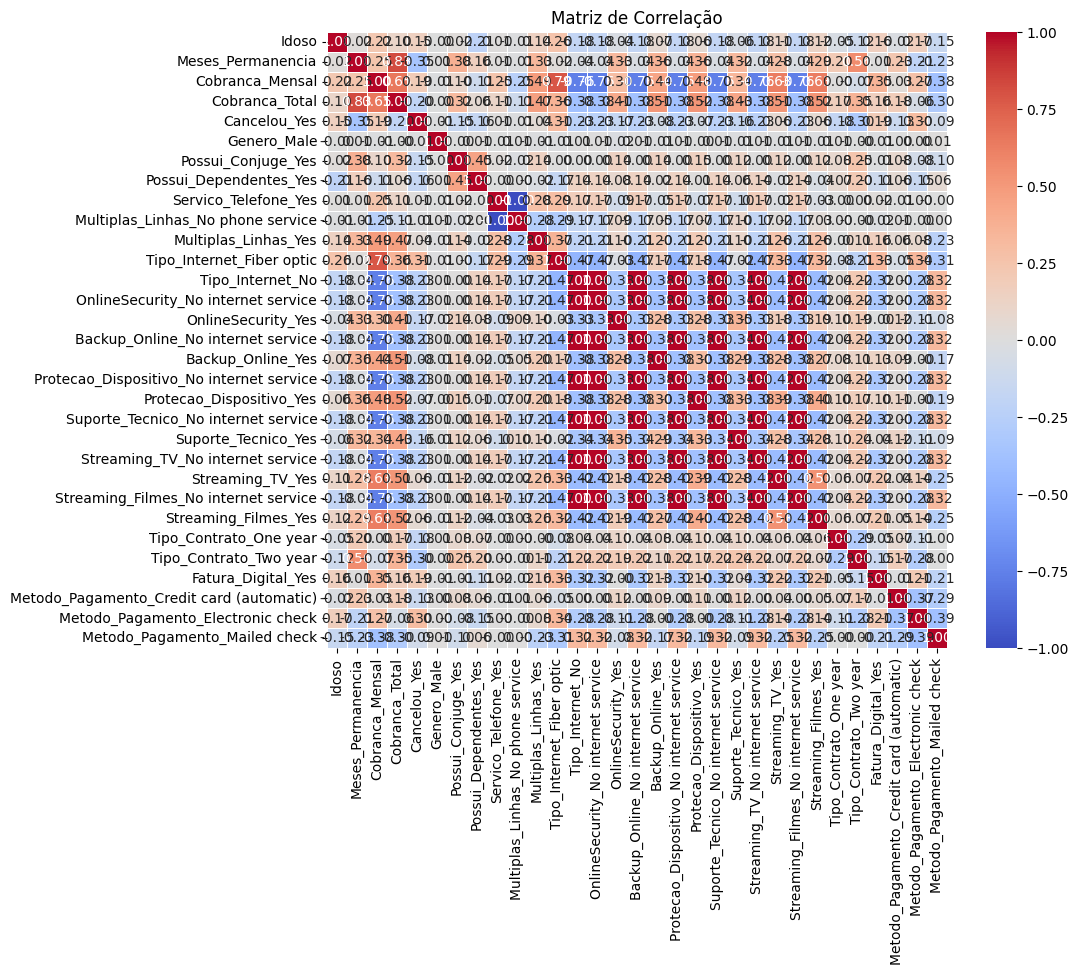

In [37]:
# Selecione apenas as colunas numéricas do DataFrame
dados_numericos = dados_encoded.select_dtypes(include=['int64', 'float64'])

# Calcule a matriz de correlação entre as colunas numéricas
correlacao = dados_numericos.corr()

# Crie uma figura com tamanho específico para o heatmap
plt.figure(figsize=(10, 8))

# Crie um heatmap da matriz de correlação
sns.heatmap(
    correlacao,  # Matriz de correlação
    annot=True,  # Exiba os valores da matriz de correlação no heatmap
    cmap='coolwarm',  # Utilize um mapa de cores que varia de azul (correlação negativa) a vermelho (correlação positiva)
    fmt='.2f',  # Formate os valores da matriz de correlação para serem exibidos com duas casas decimais
    linewidths=0.5  # Adicione linhas brancas entre as células do heatmap
)

# Adicione um título ao heatmap
plt.title('Matriz de Correlação')

# Exiba o heatmap
plt.show()


Mostrar as 10 variáveis com maior correlação absoluta com Cancelou_Yes.


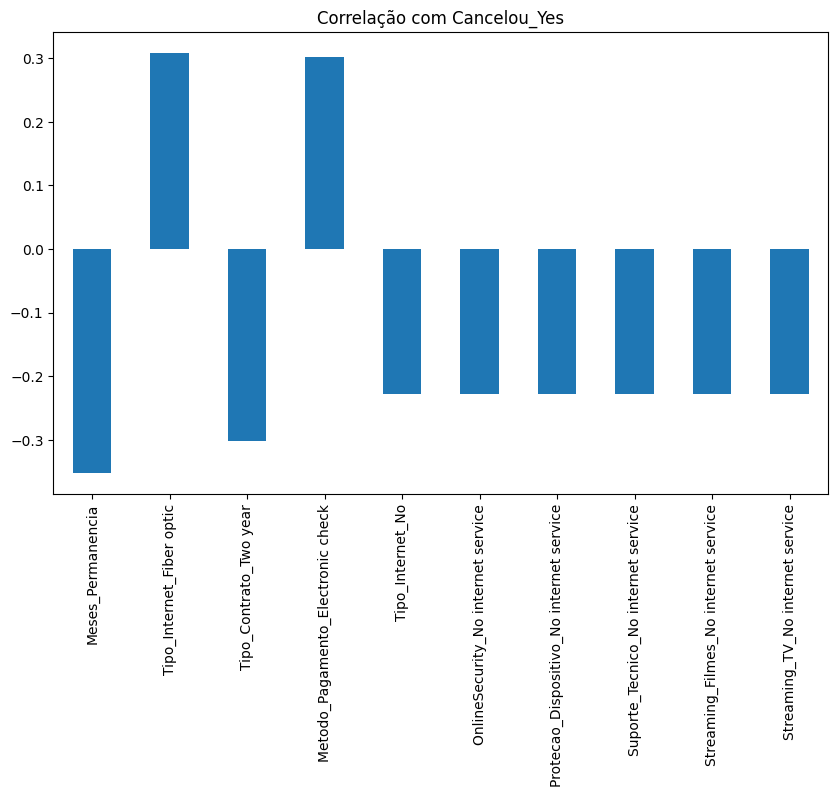

In [38]:
correlacao_com_cancelamento = correlacao['Cancelou_Yes'].drop('Cancelou_Yes').sort_values(key=lambda x: x.abs(), ascending=False).head(10)

plt.figure(figsize=(10, 6))
correlacao_com_cancelamento.plot(kind='bar')
plt.title('Correlação com Cancelou_Yes')
plt.show()

In [39]:
dados_encoded.drop([ 'Genero_Male', 'Servico_Telefone_Yes', 'Multiplas_Linhas_No phone service'], axis=1, inplace=True)

Tempo de contrato × Evasão

Total gasto × Evasão


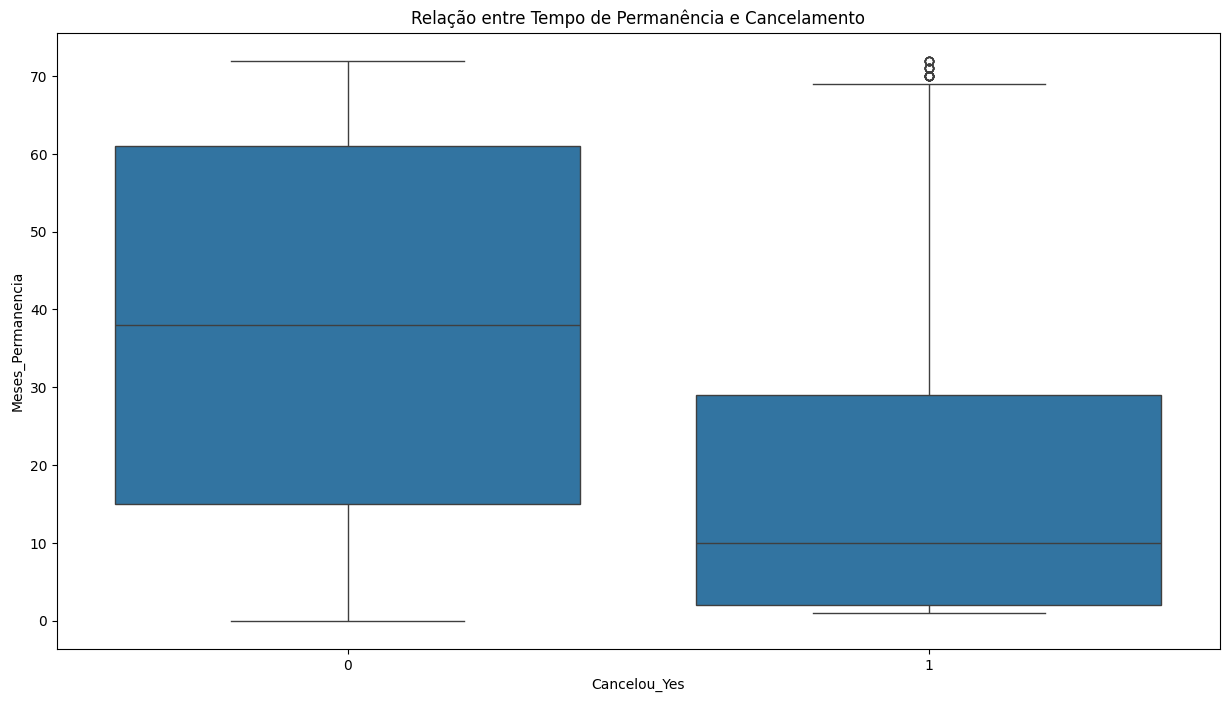

In [15]:
dados_encoded['Cancelou_Yes'] = dados_encoded['Cancelou_Yes'].astype('category')

plt.figure(figsize=(15, 8))
sns.boxplot(x="Cancelou_Yes", y="Meses_Permanencia", data=dados_encoded)
plt.title('Relação entre Tempo de Permanência e Cancelamento')
plt.show()

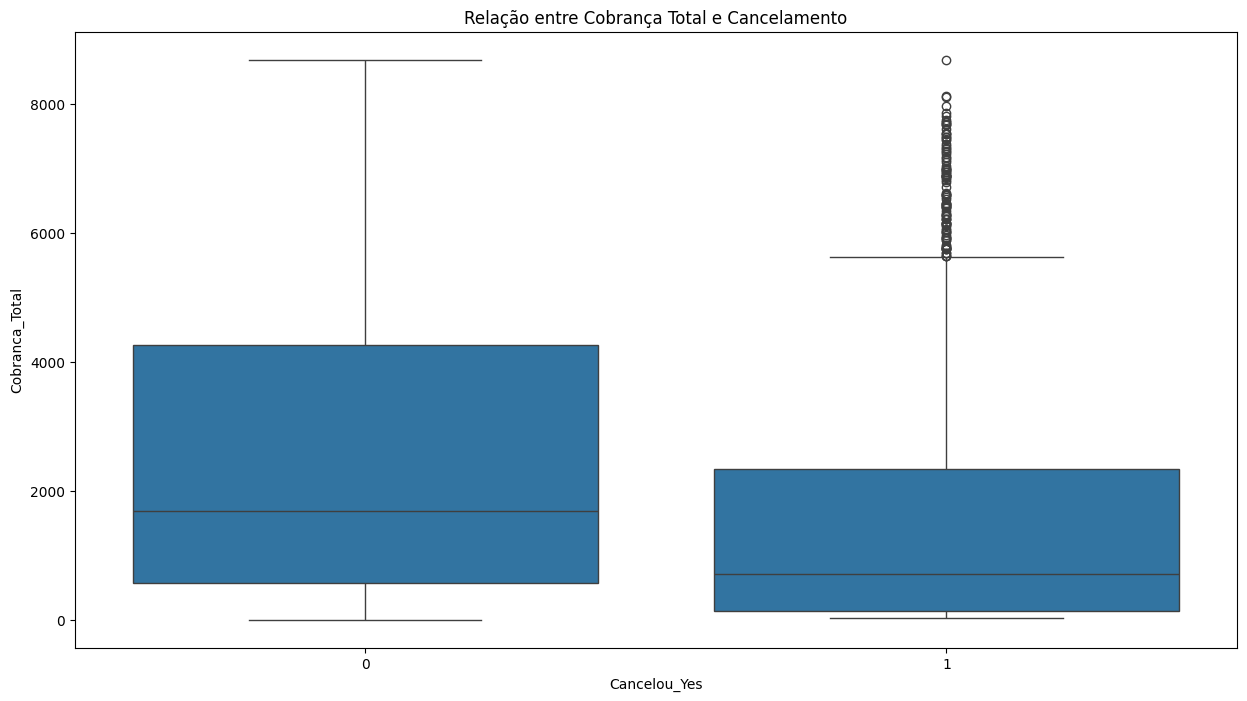

In [16]:
dados_encoded['Cancelou_Yes'] = dados_encoded['Cancelou_Yes'].astype('category')

plt.figure(figsize=(15, 8))
sns.boxplot(x="Cancelou_Yes", y="Cobranca_Total", data=dados_encoded)
plt.title('Relação entre Cobrança Total e Cancelamento')
plt.show()

Vamos remover a coluna ID_Cliente do DataFrame dados_encoded para  simplificar o conjunto de dados e focando nas variáveis que são relevantes para a análise ou modelagem.

In [40]:
dados_encoded.columns
dados_encoded.drop('ID_Cliente', axis=1, inplace=True)

Verificando se a coluna foi removida com sucesso executando:



In [41]:
print(dados_encoded.columns)

Index(['Idoso', 'Meses_Permanencia', 'Cobranca_Mensal', 'Cobranca_Total',
       'Cancelou_Yes', 'Possui_Conjuge_Yes', 'Possui_Dependentes_Yes',
       'Multiplas_Linhas_Yes', 'Tipo_Internet_Fiber optic', 'Tipo_Internet_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'Backup_Online_No internet service', 'Backup_Online_Yes',
       'Protecao_Dispositivo_No internet service', 'Protecao_Dispositivo_Yes',
       'Suporte_Tecnico_No internet service', 'Suporte_Tecnico_Yes',
       'Streaming_TV_No internet service', 'Streaming_TV_Yes',
       'Streaming_Filmes_No internet service', 'Streaming_Filmes_Yes',
       'Tipo_Contrato_One year', 'Tipo_Contrato_Two year',
       'Fatura_Digital_Yes', 'Metodo_Pagamento_Credit card (automatic)',
       'Metodo_Pagamento_Electronic check', 'Metodo_Pagamento_Mailed check'],
      dtype='object')


Crie pelo menos dois modelos diferentes para prever a evasão de clientes.

Um modelo pode exigir normalização, como Regressão Logística ou KNN.

O outro modelo pode não exigir normalização, como Árvore de Decisão ou Random Forest.

Separação de Features e Target: Dividimos os dados codificados em variáveis independentes (X) e a variável dependente (y).
Divisão em Conjuntos de Treino e Teste: Separamos os dados em conjuntos de treino e teste (X_train, X_test, y_train, y_test) usando estratificação para manter a proporção das classes.
Balanceamento de Classes com SMOTE: Aplicamos a técnica SMOTE no conjunto de treino (X_train_res, y_train_res) para balancear a classe minoritária e verificamos o resultado.

In [42]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import pandas as pd

# Separação de Features e Target
X = dados_encoded.drop('Cancelou_Yes', axis=1)
y = dados_encoded['Cancelou_Yes']

# Divisão em Conjuntos de Treino e Teste com estratificação
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verifique a proporção das classes antes do balanceamento
print("Proporção das classes antes do balanceamento:")
print(y_train.value_counts())

# Balanceamento de Classes com SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Verifique a proporção das classes após o balanceamento
print("Proporção das classes após o balanceamento:")
print(y_train_res.value_counts())


Proporção das classes antes do balanceamento:
Cancelou_Yes
0    4139
1    1495
Name: count, dtype: int64
Proporção das classes após o balanceamento:
Cancelou_Yes
0    4139
1    4139
Name: count, dtype: int64


In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Use the best parameters found by GridSearchCV
best_params = {'class_weight': 'balanced', 'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 100}
modelo = RandomForestClassifier(random_state=42, **best_params)

modelo.fit(X_train_res, y_train_res)

y_pred= modelo.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1035
           1       0.57      0.66      0.61       374

    accuracy                           0.78      1409
   macro avg       0.72      0.74      0.73      1409
weighted avg       0.79      0.78      0.78      1409



Vamos treinar um modelo de K-Nearest Neighbors (KNN) com os dados de treino balanceados e escalados, e avaliando sua performance no conjunto de teste.

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [45]:
scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

modelo_knn = KNeighborsClassifier(n_neighbors=5)
modelo_knn.fit(X_train_res_scaled, y_train_res)

Y_pred_knn = modelo_knn.predict(X_test_scaled)

print(classification_report(y_test, Y_pred_knn))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81      1035
           1       0.50      0.64      0.56       374

    accuracy                           0.73      1409
   macro avg       0.68      0.70      0.68      1409
weighted avg       0.76      0.73      0.74      1409



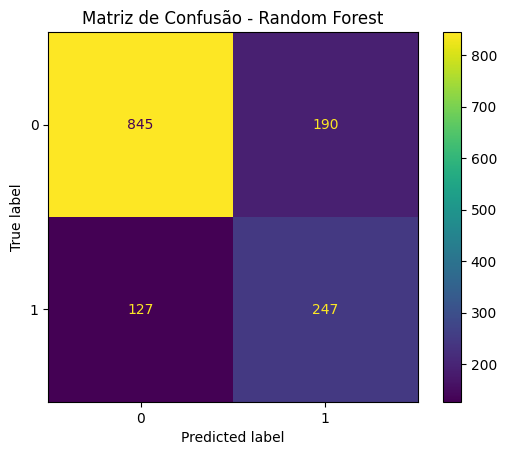

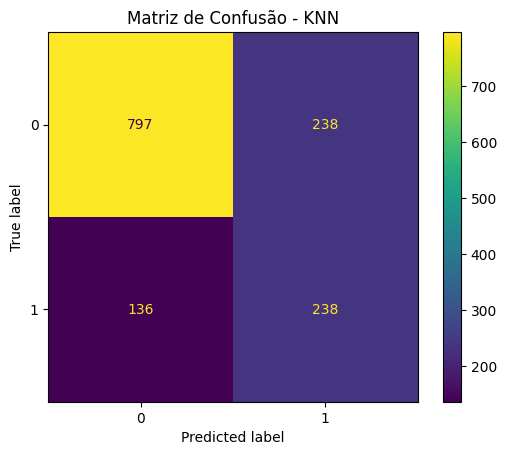

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Matriz de confusão para o modelo Random Forest
cm_rf = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm_rf).plot()
plt.title("Matriz de Confusão - Random Forest")
plt.show()

# Matriz de confusão para o modelo KNN
cm_knn = confusion_matrix(y_test, Y_pred_knn)
ConfusionMatrixDisplay(cm_knn).plot()
plt.title("Matriz de Confusão - KNN")
plt.show()

Usando o  GridSearchCV para encontrar os melhores parâmetros para um modelo, evitando o overfitting e encontrar parâmetros que generalizem bem para novos dados.


In [47]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 8, 10, 15],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced']
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1_macro')
grid.fit(X_train_res, y_train_res)

print(grid.best_params_)


{'class_weight': 'balanced', 'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 100}


Previsão de cancelamento de cliente: como posso desenvolver um modelo de machine learning que minimize os falsos negativos (FN) e maximize a precisão e recall? Quais são as principais características que influenciam a previsão de cancelamento e como posso usar essas informações para melhorar a retenção de clientes?"

Esse código avalia a performance do modelo Random Forest nos dados de treino e teste, imprimindo o relatório de classificação e a matriz de confusão para cada conjunto de dados.

Métricas Random Forest - Treino
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      4139
           1       0.93      1.00      0.96      4139

    accuracy                           0.96      8278
   macro avg       0.96      0.96      0.96      8278
weighted avg       0.96      0.96      0.96      8278

Matriz de Confusão - Treino:
[[3835  304]
 [   6 4133]]


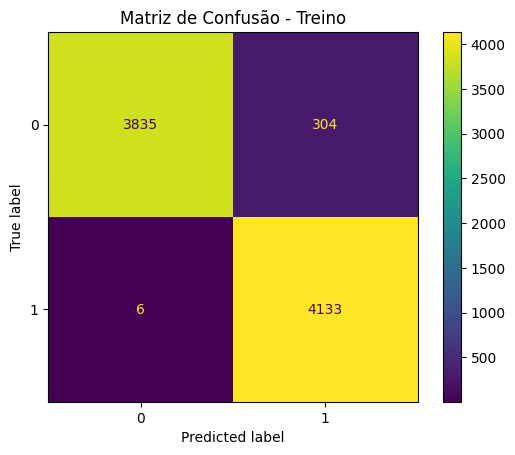

Métricas Random Forest - Teste
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1035
           1       0.57      0.66      0.61       374

    accuracy                           0.78      1409
   macro avg       0.72      0.74      0.73      1409
weighted avg       0.79      0.78      0.78      1409

Matriz de Confusão - Teste:
[[845 190]
 [127 247]]


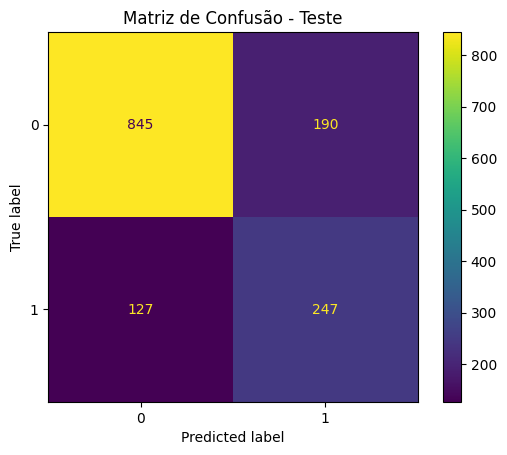

In [48]:
# Avaliação da performance do modelo nos dados de treino
print('Métricas Random Forest - Treino')
y_train_pred_rf = modelo.predict(X_train_res)
print(classification_report(y_train_res, y_train_pred_rf))

# Matriz de confusão para os dados de treino
cm_rf_train = confusion_matrix(y_train_res, y_train_pred_rf)
print("Matriz de Confusão - Treino:")
print(cm_rf_train)

# Plot da matriz de confusão para os dados de treino
ConfusionMatrixDisplay(cm_rf_train).plot()
plt.title("Matriz de Confusão - Treino")
plt.show()

# Avaliação da performance do modelo nos dados de teste
print('Métricas Random Forest - Teste')
y_test_pred_rf = modelo.predict(X_test)
print(classification_report(y_test, y_test_pred_rf))

# Matriz de confusão para os dados de teste
cm_rf_test = confusion_matrix(y_test, y_test_pred_rf)
print("Matriz de Confusão - Teste:")
print(cm_rf_test)

# Plot da matriz de confusão para os dados de teste
ConfusionMatrixDisplay(cm_rf_test).plot()
plt.title("Matriz de Confusão - Teste")
plt.show()

Vamos:

- Identificar as variáveis mais importantes para o modelo Random Forest.
- Entender como as variáveis contribuem para a previsão do modelo.
- Selecionar as variáveis mais relevantes para o modelo, se necessário.

Ao visualizar a importância das variáveis, você pode:

- Identificar padrões e tendências nos dados.
- Entender como as variáveis se relacionam entre si.
- Tomar decisões informadas sobre quais variáveis incluir ou excluir do modelo.


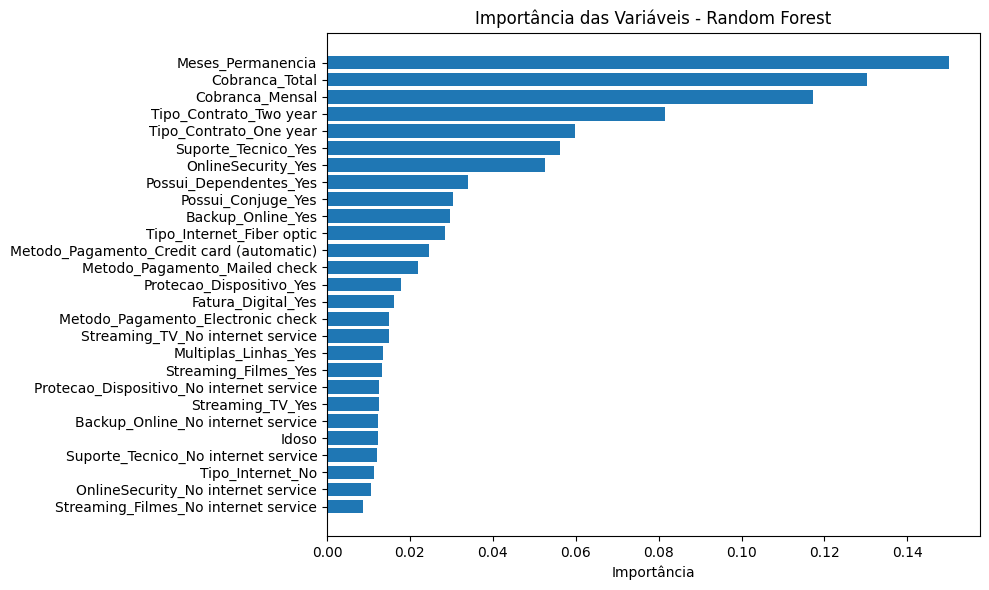

In [49]:
importancias = modelo.feature_importances_
variaveis = X_train.columns

df_importancia = pd.DataFrame({
    'Variável': variaveis,
    'Importância': importancias
}).sort_values(by='Importância', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(df_importancia['Variável'], df_importancia['Importância'])
plt.gca().invert_yaxis()
plt.title('Importância das Variáveis - Random Forest')
plt.xlabel('Importância')
plt.tight_layout()
plt.show()

Análise e Estratégias para Redução de Evasão de Clientes

Nossa análise de dados sobre evasão de clientes (churn) revelou insights valiosos que podem ser utilizados para melhorar a retenção de clientes. Identificamos os principais fatores de risco e propomos estratégias focadas para combatê-los.

Descobertas Chave da Análise

- Tempo é Ouro: Clientes com menor tempo de permanência e contratos mensais são mais propensos a cancelar. Isso sugere que a retenção de clientes é mais desafiadora nos primeiros meses e que os contratos mensais podem ser mais arriscados.
- Serviços Agregados Aumentam a Retenção: Clientes que utilizam serviços como Suporte Técnico e Segurança Online tendem a permanecer mais tempo. A ausência desses serviços aumenta o risco de churn, o que destaca a importância de oferecer serviços adicionais para aumentar a satisfação do cliente.
- O Enigma da Fibra Óptica: Clientes com serviço de internet fibra óptica apresentam maior propensão a evadir. Isso exige uma investigação mais profunda sobre a qualidade do serviço ou a competitividade na área, para entender melhor os motivos por trás dessa tendência.
- Laços Familiares Contam: Clientes com cônjuge ou dependentes na conta demonstram menor risco de evasão. Isso sugere que os clientes que têm uma conexão emocional com a empresa são mais propensos a permanecer.

Essas descobertas chave podem ser utilizadas para desenvolver estratégias de retenção mais eficazes e melhorar a satisfação do cliente. Algumas possíveis estratégias incluem:

- Oferecer serviços adicionais para aumentar a satisfação do cliente.
- Desenvolver programas de retenção específicos para clientes com menor tempo de permanência.
- Investigar a qualidade do serviço de internet fibra óptica e melhorar a competitividade na área.
- Oferecer incentivos para clientes que têm laços familiares com a empresa.

Ao entender melhor os fatores de risco e desenvolver estratégias focadas, podemos reduzir a evasão de clientes e melhorar a satisfação do cliente.



**Modelagem Preditiva**

  Modelo de Escolha: O modelo Random Forest superou o KNN, alcançando um recall de 0.65 para a classe de evasão. Isso significa que ele consegue identificar 65% dos clientes que realmente irão cancelar, tornando-o a melhor ferramenta para nossa estratégia de retenção.

  Prioridade nos Dados: O tempo de permanência (Meses_Permanencia), o tipo de contrato e os serviços agregados são os preditores mais fortes no nosso modelo.


**Estratégias de Retenção Propostas**

  Foco nos Recém-Chegados: Crie um programa de boas-vindas ativo para novos clientes nos primeiros meses. Um bom onboarding pode ser a diferença entre um cliente que fica e um que sai.

  Incentive Contratos Longos: Ofereça descontos ou benefícios exclusivos para clientes que optarem por contratos anuais ou de dois anos.

  Venda Valor, Não Apenas Serviço: Promova a adesão a serviços agregados como Suporte Técnico e Segurança Online, educando o cliente sobre o valor que esses serviços trazem.

  Investigue o Problema da Fibra: Lance uma iniciativa para entender o que está acontecendo com os clientes de fibra. O problema é técnico, de preço ou de concorrência? Use esses insights para corrigir a rota.

  Personalize a Retenção: Use o modelo Random Forest para identificar proativamente os clientes de alto risco e ofereça promoções ou benefícios personalizados antes que eles pensem em cancelar.
